In [ ]:
# Loafd the Data

import pandas as pd


In [ ]:
cc = pd.read_csv("/content/drive/MyDrive/Datasets/Concrete DS/compresive_strength_concrete.csv")


cc.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
cc.shape , cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

((1030, 9), None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
for i in cc.columns:
    sns.distplot(cc[i])
    plt.show()

In [ ]:
cc.describe()
cc.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:


q1=cc.quantile(0.25)
q3=cc.quantile(0.75)
IQR=q3-q1

cwo=((cc.iloc[:] <(q1-1.5*IQR))|(cc.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=cc.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(cc),2)
opdf

,No. of Outliers,Percentage Outliers
Cement (component 1)(kg in a m^3 mixture),0,0.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture),2,0.19
Fly Ash (component 3)(kg in a m^3 mixture),0,0.00
Water (component 4)(kg in a m^3 mixture),9,0.87
Superplasticizer (component 5)(kg in a m^3 mixture),10,0.97
Coarse Aggregate (component 6)(kg in a m^3 mixture),0,0.00
Fine Aggregate (component 7)(kg in a m^3 mixture),5,0.49
Age (day),59,5.73
"Concrete compressive strength(MPa, megapascals)",4,0.39


Then we calculate the columns wise outliers. To determine in each row what is the presence of outliers.

In [ ]:
import numpy as np

rwo=(((cc[:]<(q1-1.5*IQR))|(cc[:]>(q3+1.5*IQR))).sum(axis=1))
ro005=(((rwo/len(cc.columns))<0.05).sum())*100/len(cc)
ro01=(((rwo/len(cc.columns))<0.1).sum())*100/len(cc)
ro015=(((rwo/len(cc.columns))<0.15).sum())*100/len(cc)
ro02=(((rwo/len(cc.columns))<0.2).sum())*100/len(cc)
ro025=(((rwo/len(cc.columns))<0.25).sum())*100/len(cc)
ro03=(((rwo/len(cc.columns))<0.30).sum())*100/len(cc)
ro035=(((rwo/len(cc.columns))<=0.35).sum())*100/len(cc)
ro04=(((rwo/len(cc.columns))<=0.4).sum())*100/len(cc)
ro045=(((rwo/len(cc.columns))<=0.45).sum())*100/len(cc)
ro05=(((rwo/len(cc.columns))<=0.50).sum())*100/len(cc)
ro055=(((rwo/len(cc.columns))<0.55).sum())*100/len(cc)
ro06=(((rwo/len(cc.columns))<0.6+0).sum())*100/len(cc)
ro=pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Data'])
ro.index.name='% Outlier'
ro

,% Data
% Outlier,
5%,91.36
10%,91.36
15%,100.00
20%,100.00
25%,100.00
30%,100.00
35%,100.00
40%,100.00
45%,100.00


More than 10% outliers of each row is not present. Hence the few outliers that will be treated using MICE (Multiple Imputation using Chained Equations) approach after these outliers are converted to NaN values.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer()
imp.fit(cc)
cc=pd.DataFrame(imp.transform(cc),columns=cc.columns)



```
Thus we can see all outliers have been treated and removed by converting them to NaN values and imputing them using MICE.
```



In [ ]:
cc.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Bivariate Analysis

In [ ]:
g=cc.groupby('Age (day)')
g1=g.get_group(1)
g3=g.get_group(3)
g7=g.get_group(7)
g14=g.get_group(14)
g28=g.get_group(28)
pd.DataFrame(round(g28.iloc[:,-1].sort_values()).unique(),columns=['Comp Strength @ 28 days'])

,Comp Strength @ 28 days
0,9.0
1,10.0
2,11.0
3,12.0
4,13.0
...,...
62,75.0
63,76.0
64,79.0
65,80.0


Different types of concrete grades available and usually used are M7,M7.5,M10,M15,M20,M725,M30,M35,M40,M45,M50,M55,M60,M65,M70

It essentially means at 28 days time the compressive strength should be 7MPa for M7 and 70MPa for M70.

However we can see lots of grades of concrete. This could be due to variation in other contents of the concrete.

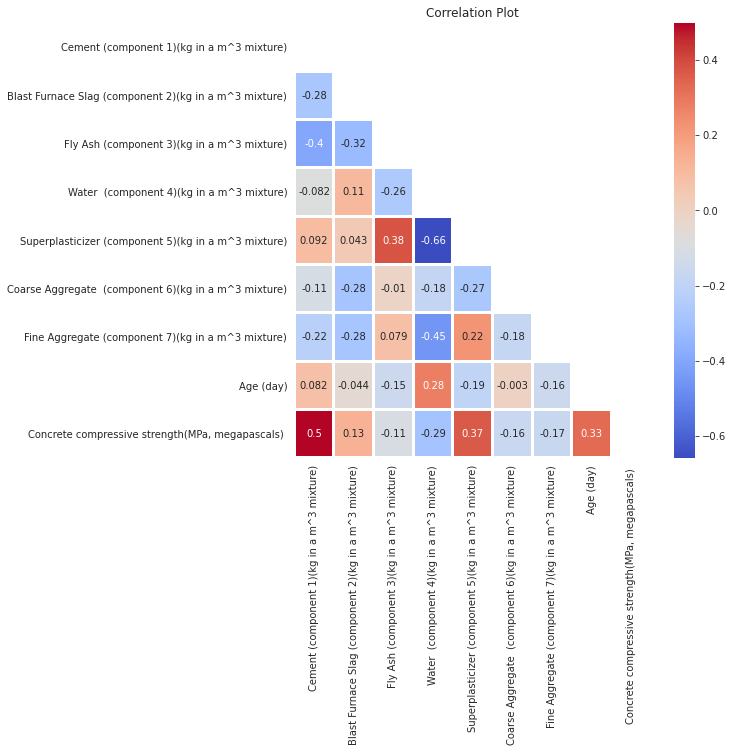

In [ ]:
cp = cc.corr()
mask = np.zeros_like(cp)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = mask,cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()


None of the features are highly inter correlated or correlated with the target variable.

Linear Regression - OLS



In [ ]:
import statsmodels.api as sm
X=cc.iloc[:,:8]
Y=cc.iloc[:,8]

In [ ]:
ls=sm.OLS(Y,sm.add_constant(X))
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Mon, 29 Mar 2021   Prob (F-statistic):          6.29e-206
Time:                                                      15:03:26   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that the constant term is having P value greater than 0.05 viz. the assumed level of significance, thus we remove the constant term from modelling

In [ ]:
ls=sm.OLS(Y,X)
results=ls.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                OLS Regression Results                                               
=====================================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared (uncentered):                   0.931
Model:                                                          OLS   Adj. R-squared (uncentered):              0.931
Method:                                               Least Squares   F-statistic:                              1732.
Date:                                              Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                                                      15:03:32   Log-Likelihood:                         -3869.4
No. Observations:                                              1030   AIC:                                      7755.
Df Residuals:                                                  1022   BIC:                                      7794.
Df Model:                                                         8                                                  
Covariance Type:                                          nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Cement (component 1)(kg in a m^3 mixture)                 0.1134      0.004     26.692      0.000       0.105       0.122
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.0962      0.005     18.488      0.000       0.086       0.106
Fly Ash (component 3)(kg in a m^3 mixture)                0.0793      0.008     10.077      0.000       0.064       0.095
Water  (component 4)(kg in a m^3 mixture)                -0.1822      0.016    -11.345      0.000      -0.214      -0.151
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2647      0.088      3.008      0.003       0.092       0.437
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0103      0.003      3.364      0.001       0.004       0.016
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0113      0.004      3.188      0.001       0.004       0.018
Age (day)                                                 0.1140      0.005     21.031      0.000       0.103       0.125
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.269
Skew:                          -0.175   Prob(JB):                       0.0717
Kurtosis:                       3.031   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Without the constant term we can observe that the R-squared value has increased drastically.

SKLEARN - Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Score:  0.6198878872999795
Train R2 score:  0.6198878872999795
Test R2 score:  0.599040745792033


Polynomial Regression - Degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.8172038065743745
Test R2 - degree 2 polynomial:  0.7807213876067471


Polynomial Regression - Degree 3¶

In [ ]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9341610525111006
Test R2 - degree 2 polynomial:  0.7874393814611411


Polynomial Regression - Degree 4

In [ ]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9849841960640493
Test R2 - degree 2 polynomial:  -577.1380297907249


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred_dttr=dt.predict(X_train)
y_pred_dtte=dt.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dttr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtte))

Train R2 score:  0.9991684139549186
Test R2 score:  0.7757899111667415


The fully grown tree is overfitting. This can be controlled by pruning the tree. Using grid search we find the optimum depth and the impurity criterion and other hyper parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.7865531091291377


In [ ]:
dtpr=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train,y_train)
y_pred_dtprtr=dtpr.predict(X_train)
y_pred_dtprte=dtpr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dtprtr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtprte))

Train R2 score:  0.9170918141377655
Test R2 score:  0.7878453073859565


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


It's severely overfit even now. We still have to prune it.

In [ ]:
param_grid = {'max_depth': np.arange(3, 6),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100,105, 90,95],
             'min_samples_split': [6,7,8,9,10],
             'max_features':[2,3,4,5,6]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=6, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.745720791410508


In [ ]:
dtpr=DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=6,
                      max_leaf_nodes=95, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train,y_train)
y_pred_dtprtr=dtpr.predict(X_train)
y_pred_dtprte=dtpr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dtprtr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtprte))

Train R2 score:  0.8226265909948156
Test R2 score:  0.7673373063443205


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


The overfit has reduced but the model performance has nt imporoved on the test data. So we now move onto other models.

AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(X_train, y_train)
abr.feature_importances_  
abr.fit(X_train,y_train)
abr.score(X_train,y_train)
y_pred_abrtr=abr.predict(X_train)
y_pred_abrte=abr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_abrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_abrte))

Train R2 score:  0.8384045971041355
Test R2 score:  0.7946214963198406


Adaboost has reduced the variance and improved the model performance as well.

RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)
y_pred_rfrtr=rfr.predict(X_train)
y_pred_rfrte=rfr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_rfrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfrte))

Train R2 score:  0.9867301371589984
Test R2 score:  0.8837028880393699


The random forest is overfitting but has improved the model performance. So we now tune the hyper parameters to reduce the overfit.

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))

Train R2 score:  0.9535516821870236
Test R2 score:  0.8831898289400316


In [ ]:
#param_grid = {'n_estimators': [230],
#              'max_depth': range(10,31,2), 
#              'min_samples_split': range(50,501,10), 
#              'learning_rate':[0.2]}
#clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
#                   param_grid = param_grid, scoring='r2', 
#                   cv=5).fit(X_train, y_train)
#print(clf.best_estimator_) 
#print("R Squared:",clf.best_score_)

In [ ]:
gb=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=14,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=150,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


Train R2 score:  0.9953989179054227
Test R2 score:  0.9350778735211032


This model is slightly overfit. XGBoost may or may not reduce it. Trying out XGBoost in the next step.

XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
print('Model Score: ', xgb.score(X_train,y_train))
y_pred_xgbtr=xgb.predict(X_train)
y_pred_xgbte=xgb.predict(X_test)
print('Train R2-Score: ', r2_score(y_train,y_pred_xgbtr))
print('Test R2-Score: ', r2_score(y_test,y_pred_xgbte))

[15:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Score:  0.9502501283675564
Train R2-Score:  0.9502501283675564
Test R2-Score:  0.8869062658297348


In [ ]:
xgb=XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.65, colsample_bytree=1, gamma=0.3,
             importance_type='weight', learning_rate=0.2, max_delta_step=150,
             max_depth=4, min_child_weight=0.5, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)
print('Model Score: ', xgb.score(X_train,y_train))
y_pred_xgbtr=xgb.predict(X_train)
y_pred_xgbte=xgb.predict(X_test)
print('Train R2-Score: ', r2_score(y_train,y_pred_xgbtr))
print('Test R2-Score: ', r2_score(y_test,y_pred_xgbte))

Model Score:  0.9936840993551446
Train R2-Score:  0.9936840993551446
Test R2-Score:  0.9251821490450421


Here we have achieved a model which performes well with both test and train data. This is very lightly overfit. It can be further adjusted. But this project will focus on the interpretability of the model.

Interpreting Black Box Models

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

for i in X_train.columns:
    shap.dependence_plot(i,shap_values, X_train)

AttributeError: ignored

From the first plot we can see that Cement content and presence of super plasticizer has a linear impact on the model. When the cement content is less than 300 compressive strength decreases. As the cement content increases beyond 300, the compressive strength increases as well. The compressive strength increases with higher content of super plasticizers.
From the second plot we observe, when the blast furnace slag is greater than 50 kg/m3, the comrpessive strength increases. This feature in combination with age is responsible for the compressive strength.
From the third plot we observe, when there is no fly ash present, but the mix with highest content of superplasticizers have a positive impact on the compressive strength. However the fly ash has an increasing followed by decreasing trend with the compressive strength. When the fly ash is in the range of 75-150 kg/m3 range, with super plasticizer content of 10 kg/m3 leads to highest compressive strength observed. Similary in the range of fly ash > 150 kg/m3 the least compressive strength was observed.
From plot 4, we observe that water and blast furnace slag along with their interactive effect contributes to the compressive strength. Water content less than 150 kg/m3 with lower blast furnac slag provides the highest compressive strength. For water content greater than 150 kg/m3, higher blast furnace slag is preferred to have greater compressive strength.
From plot 5, superplasticizers in the range of 10-12kg/m3 along with higher blast furnace slag increases the compressive strength.
Plot 6 suggests that, with increasing coarse aggregate, keeping the coment content lower, has positive impact on the compressive strength.
For fine aggregates less than around 650 kg/m3, the water content should be greater than 180 kg/m3. Further, if the fine aggregate content is greater than 650 kg/m3, water content should be lesser than 170 kg/m3.
From plot 8, with increasing age, the compressive strength surely increases, however different amount of water content surely has an effect with age. For 28 days strength, having water content greater than 300kg/m3 is desired.